<a href="https://colab.research.google.com/github/Alzategelizabeth/Cartografia-/blob/main/Taller%20Final/MetodosconBaseFisica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##**Variables**


array([ 5. , 26. , 31.5,  nan], dtype=float32)

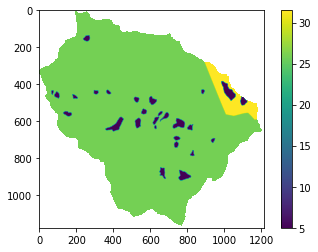

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%20Final/Base%20Fisica/raster/Cohesion.tif?raw=true') # (kN/m2)
cohesion=raster.read(1)
cohesion=np.where ( cohesion==55,5,cohesion )
cohesion=np.where(cohesion==cohesion[0,0],np.nan,cohesion)
plt.imshow(cohesion)
plt.colorbar();
np.unique(cohesion)

array([0.41538836, 0.45378561, 0.46600291,        nan])

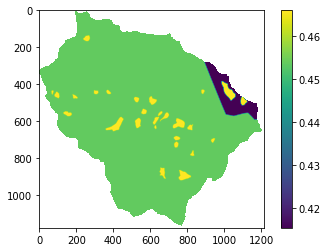

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%20Final/Base%20Fisica/raster/Friccion.tif?raw=true') #(radianes)
friccion=raster.read(1)*(np.pi/180)
friccion=np.where(friccion==friccion[0,0],np.nan,friccion) #ya py lee los nans
plt.imshow(friccion)
plt.colorbar();
np.unique(friccion)

array([0.25, 0.8 , 0.9 ,  nan])

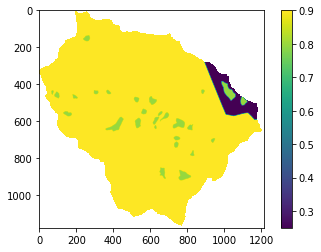

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%20Final/Base%20Fisica/raster/permeabilidad2.tif?raw=true') #(cm/hora)
ks=raster.read(1)
ks=np.where ( ks==1.3,0.9,ks )
ks=np.where(ks==ks[0,0],np.nan,ks)
plt.imshow(ks)
plt.colorbar();
np.unique(ks)

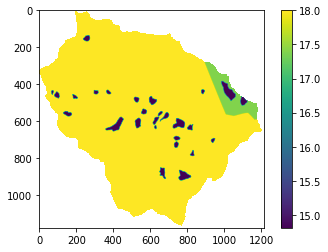

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%20Final/Base%20Fisica/raster/Pesoespecifico.tif?raw=true') #(kN/m3)
peso=raster.read(1)
peso=np.where(peso==peso[0,0],np.nan,peso)
plt.imshow(peso)
plt.colorbar();

<ipython-input-24-e91f6e426626>:2: RuntimeWarning: overflow encountered in multiply
  flujo=raster.read(1)*4


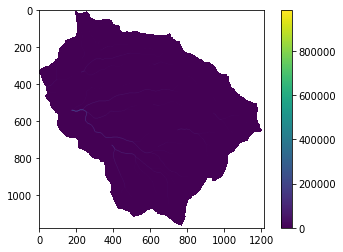

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%20Final/Base%20Fisica/raster/FlujoAcumulado.tif?raw=true') #(m2)
flujo=raster.read(1)*4
flujo=np.where(flujo==flujo[0,0],np.nan,flujo)
plt.imshow(flujo)
plt.colorbar();

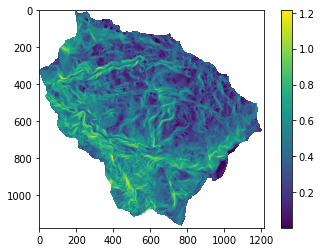

In [ ]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente2.tif?raw=true') #(radianes)
pendiente1=raster.read(1)
pendiente=pendiente1*(3.1415926/180)
pendiente=np.where(pendiente==0,0.0001,pendiente)
pendiente=np.where(pendiente==pendiente[0,0],np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar()

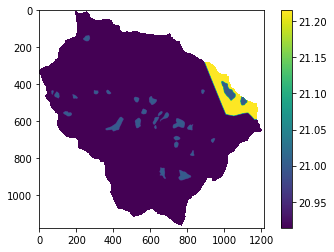

In [ ]:
espesor1 = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%20Final/Base%20Fisica/raster/Espesor.tif?raw=true') #(m)

espesor1=espesor1.read(1)
espesor=(-0.43*espesor1) + 21.43
espesor=np.where(espesor<=0,0.5,espesor)
espesor=np.where(espesor==espesor[0,0],np.nan,espesor)
plt.imshow(espesor)
plt.colorbar()

In [ ]:
GammaW   = 9.81 #peso unitario del agua [kN/m3]
dx = 2 # resolucion espacial del raster [m]
q =2478 #intensidad de la precipitacion [mm/h]

In [ ]:
"STABILITY ANALYSIS"

MatEst = np.zeros(raster.shape)
Matq   = np.zeros(raster.shape)

M4=flujo/dx
M5=((0.01 * ks * (espesor * np.cos(pendiente)) * np.sin(pendiente)) / (0.001*q)) * ((peso / GammaW) * (1 - np.tan(pendiente) / np.tan(friccion)) + (cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))) 
MatEst1=np.where(M4>M5,3,MatEst) #  unstable

MatEst2=np.where(M4<=M5,4,MatEst1) # Stable

M1=np.tan(pendiente)
M2=(1 - (GammaW/peso)) * np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst3  =np.where(M1<M2,1,MatEst2) # Unconditionally stable
	
M3=np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst4  =  np.where(M1>=M3,2,MatEst3) # Unconditionally Unstable

Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * ((peso / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))
np.nanmin(Matq)

MatEst=np.where(MatEst4 == 0, np.nan,MatEst4)
Matq=np.where(Matq==np.inf,np.nanmax(Matq[Matq!=np.inf]),Matq)

Matq = np.where(M1<M2,-1,np.where(M1>=M3,-2,Matq))

<ipython-input-28-ed59e4226f40>:19: RuntimeWarning: divide by zero encountered in true_divide
  Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * ((peso / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))


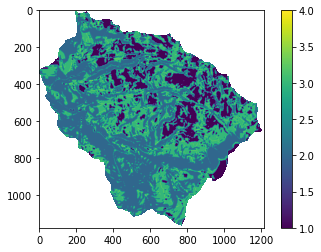

In [ ]:
plt.imshow(MatEst)
plt.colorbar()
plt.savefig('MatEst.png', dpi=300)

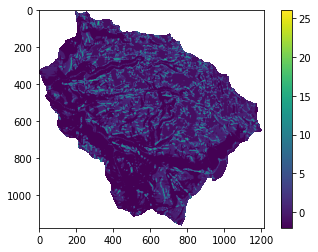

In [ ]:
plt.imshow(Matq)
plt.colorbar()
plt.savefig('Matq.png', dpi=300)

In [ ]:
with rio.open('MatEst.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(MatEst,1)

In [ ]:
with rio.open('Matq.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(Matq,1)  

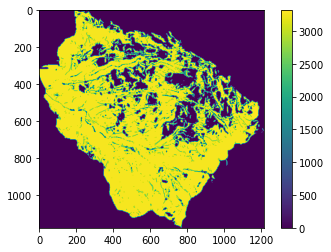

In [ ]:
Vol = np.where(np.logical_or(MatEst==2, MatEst==3), espesor*12.5*12.5, 0)

with rio.open('Vol.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(Vol,1) 

plt.imshow(Vol)
plt.colorbar()
plt.savefig('Vol.png', dpi=300)